In [28]:
#Installer tous les paquets nécessaires 
%pip install pandas==1.5.3 numpy scikit-learn ppscore category_encoders matplotlib seaborn jupyter  pyarrow imbalanced-learn scikit-learn tdqm


^C
Note: you may need to restart the kernel to use updated packages.


  Using cached scikit_learn-1.7.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip uninstall numpy pandas scikit-learn ppscore -y


Found existing installation: numpy 2.3.0
Uninstalling numpy-2.3.0:
  Successfully uninstalled numpy-2.3.0
Found existing installation: pandas 1.5.3
Uninstalling pandas-1.5.3:
  Successfully uninstalled pandas-1.5.3
Found existing installation: scikit-learn 1.7.0
Uninstalling scikit-learn-1.7.0:
  Successfully uninstalled scikit-learn-1.7.0
Found existing installation: ppscore 1.3.0
Uninstalling ppscore-1.3.0:
  Successfully uninstalled ppscore-1.3.0
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.


In [ ]:
%pip install numpy==1.26.4 pandas==1.5.3 scikit-learn==1.3.2 ppscore==1.3.0


  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached ppscore-1.3.0-py2.py3-none-any.whl
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB 131.3 kB/s eta 0:02:01
   ---------------------------------------- 0.0/15.8 MB 163.8 kB/s eta 0:01:37
   ---------------------------------------- 0.0/15.8 MB 179.6 kB/s eta 0:01:28
   ---------------------------------------- 0.1/15.8 MB 252.2 kB/s eta 0:01:03
   ---------------------------------------- 0.1/15.8 MB 327.7 kB/s eta 0:00:48
   ---------------------------------------- 0.1/15.8 MB 426.7 kB/s eta 0:00:37
    --------------------------------------- 0.3/15.8 MB 684.6 kB/s eta 0:00:23
    ----------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.8.1 requires scikit-learn>=1.6.0, but you have scikit-learn 1.3.2 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

import ppscore as pps   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jupyter
import sklearn
import pyarrow as pa
import pyarrow.parquet as pq
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler


## Données

In [33]:

# 1. Charger le CSV en forçant le type 'string' pour les colonnes problématiques
df_train = pd.read_csv('data/train_fin_EDA.csv', dtype={'addr1': 'string', 'addr2': 'string'}, low_memory=False)

# 2. Remplacer les NaN par 'undefined'
df_train .iloc[:, [10, 11]] = df_train .iloc[:, [10, 11]].fillna('undefined')


C:\Users\I7 7eme\AppData\Local\Temp\ipykernel_11536\3572857717.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_train .iloc[:, [10, 11]] = df_train .iloc[:, [10, 11]].fillna('undefined')


In [34]:
# 1. Importer les données de test avec conversion de type
df_test = pd.read_csv('data/test_fin_EDA.csv', 
                     dtype={'addr1': 'string', 'addr2': 'string'},
                     low_memory=False)

# 2. Vérification
print("Types des colonnes dans df_test:")
print(df_test[['addr1', 'addr2']].dtypes)


Types des colonnes dans df_test:
addr1    string
addr2    string
dtype: object


In [35]:
 # 2. Supprimer les colonnes indésirables
colonnes_a_supprimer = ['txn_per_day_y', 'txn_per_day_x']
df_train = df_train.drop(columns=colonnes_a_supprimer, errors='ignore')  


In [36]:
print(df_train.shape)
print(df_test.shape)

(472432, 328)
(118108, 434)


In [ ]:
# 3. Réexportation
#df_train.to_csv('data/df_train_EDA_f.csv', index=False)  

#df_test.to_csv('data/df_test_EDA_f.csv', index=False)  

#df_test.to_parquet('data/df_test_EDA_f.parquet', index=False)  
#df_train.to_parquet('data/df_train_EDA_f.parquet', index=False) 

In [41]:
#importation des données
df_train = pd.read_parquet("data/df_train_EDA_f.parquet")

In [45]:
# Afficher les 5 premières lignes du DataFrame dimensions
df_parquet = df_train.copy()
print("Dimensions du DataFrame :", df_parquet.shape)
df_parquet.head()

Dimensions du DataFrame : (472432, 328)


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,R_emaildomain_2,P_emaildomain_1,P_emaildomain_2,M_missing_count,dist1_digitalized,Transaction_day,Transaction_hour,Transaction_days_since_start,delta_card1,txn_per_day
0,3023634,916268,183.0,W,1001,555.0,150.0,visa,226.0,debit,...,undefined,yahoo,com,0,8,10,14,10.604954,-0.000278,2762
1,3151336,3504180,29.0,W,1001,555.0,150.0,visa,226.0,debit,...,undefined,yahoo,com,0,8,40,13,40.557639,718.864444,2360
2,3210739,5270458,27.0,W,1001,555.0,150.0,visa,226.0,debit,...,undefined,yahoo,com,0,8,61,0,61.000671,490.632778,2481
3,3020767,842821,150.0,R,1004,583.0,150.0,visa,226.0,credit,...,com,gmail,com,0,8,9,18,9.754873,-0.000278,3170
4,3386444,10082484,50.0,H,1004,583.0,150.0,visa,226.0,credit,...,undefined,aol,com,0,8,116,16,116.695417,2566.573056,2509


In [46]:
#Variables avec des na
na = df_parquet.isna().sum()
# Afficher les variables avec des valeurs manquantes    
na = na[na > 0]
print("Variables avec des valeurs manquantes :")
print(na)
#nombre de varia les avec des na
print("Nombre de variables avec des valeurs manquantes :", len(na))

Variables avec des valeurs manquantes :
P_emaildomain     75591
R_emaildomain    362236
DeviceType       359497
DeviceInfo       377225
dtype: int64
Nombre de variables avec des valeurs manquantes : 4


## Création de nouvelles variables

In [49]:
# 1. Extraire le jour de la semaine à partir de la reférence qui est TransactionDT
df_parquet['Jour_de_semaine'] = (df_parquet['TransactionDT'] // 86400) % 7

#  Pertinence : Cela permet de capturer des comportements temporels récurrents.
# Les fraudes peuvent être plus fréquentes certains jours (ex. le week-end).
# Identifier ces patterns temporels est utile pour la détection.

# 2. Log du montant de la transaction
df_parquet['Log_Montant'] = df_parquet['TransactionAmt'].apply(lambda x: np.log(x + 1) if x != 999 else 999)

#  Pertinence : Réduit l’effet des valeurs extrêmes dans TransactionAmt.
# Le log aide les modèles à mieux gérer les écarts importants de montants.
# 999 est conservé comme valeur manquante codée.

# 3. Partie décimale du montant
df_parquet['Cents_Montant'] = df_parquet['TransactionAmt'].apply(lambda x: x - np.floor(x))

#  Pertinence : Certaines fraudes utilisent des montants entiers précis.
# La présence ou absence de cents peut signaler une transaction anormale.
# On conserve 999 si la valeur de base est invalide.

# 4. Ratio montant / moyenne carte1
moyenne_par_carte = df_parquet[df_parquet['TransactionAmt'] != 999].groupby('card1')['TransactionAmt'].mean()
df_parquet['Ratio_Montant_Carte'] = df_parquet.apply(
    lambda row: row['TransactionAmt'] / moyenne_par_carte[row['card1']] if row['TransactionAmt'] != 999 and row['card1'] in moyenne_par_carte else 999,
    axis=1
)


# Le choix de card1 est basé sur le fait que c'est un identifiant numérique unique qui représente partiellement une 
# carte de paiement ou un utilisateur. Tandis que les autres variables sont plus générales et renseignent par 
# exeple le type de carte, le code postal, etc
#  Pertinence : Compare la transaction actuelle à l’habitude de la carte.
# Une anomalie de comportement (montant beaucoup plus grand/petit) peut être suspecte.
# Si la moyenne n’est pas disponible, on garde 999.

# 5. Temps écoulé depuis la dernière transaction pour une même carte
Delta_temps_carte = df_parquet.sort_values(by=['card1', 'TransactionDT'])
df_parquet['Delta_Temps_dernière_TX'] = Delta_temps_carte.groupby('card1')['TransactionDT'].diff().fillna(999)

#  Pertinence : Une fréquence anormale de transactions peut signaler une fraude.
# Un enchaînement trop rapide ou trop long est souvent suspect.
# 999 est utilisé pour la première transaction de la carte.


# 6. Variable d’interaction : card1 + addr1
df_parquet['card1_addr1'] =Delta_temps_carte.apply(
    lambda row: f"{row['card1']}_{row['addr1']}" if row['addr1'] != 999 else 'undefined',
    axis=1
)

# 8. Créer une variable qui compte le nombre de variabes commençant par id_ manquantes
df_parquet['Count_id_missing'] = Delta_temps_carte.filter(like='id_').isna().sum(axis=1)

# Données avec de nouvelles variables ajoutées
data_with_new_features = df_parquet.copy()

In [50]:
#taille de data_with_new_features
print("Dimensions du DataFrame avec les nouvelles variables :", data_with_new_features.shape)

Dimensions du DataFrame avec les nouvelles variables : (472432, 335)


### Suppression des variables non utilisés directement (mais à utiliser dans le pipeline)

In [53]:
#Supprimer les variables qui ne sont pas utiles pour l'analyse
df_parquet = df_parquet.drop(columns=['TransactionID', 'DeviceType', 'DeviceInfo','P_emaildomain', 'R_emaildomain'])

## Encodage des variables

In [54]:
#la liste des variables catégorielles
cat_vars = df_parquet.select_dtypes(include=['object']).columns.tolist()
# Afficher les variables catégorielles
print("Variables catégorielles :", cat_vars)
#  liste des variables numériques
num_vars = df_parquet.select_dtypes(include=['number']).columns.tolist()
# Afficher les variables numériques
print("Variables numériques :", num_vars)

Variables catégorielles : ['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceInfo_processed', 'DeviceType_imputed', 'R_emaildomain_1', 'R_emaildomain_2', 'P_emaildomain_1', 'P_emaildomain_2', 'card1_addr1']
Variables numériques : ['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'dist1', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39

In [55]:
#Listes des variables catégorielles et numériques
cat_var_man = ['card1', 'card2', 'card3', 'card5', 'addr1', 'addr2']
cat_vars_f = cat_vars+ cat_var_man

In [56]:
# Transformer le format des variables 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'DeviceInfo' pour qu'elles soient vus comme catégorielles
for col in cat_var_man:
    df_parquet[col] = df_parquet[col].astype('category')
    

In [57]:
#liste des variables catégorielles
cat_vars = df_parquet.select_dtypes(include=['object']).columns.tolist()
# Afficher les variables catégorielles
print("Variables catégorielles :", cat_vars)
# Code pour avoir la liste des variables numériques
num_vars = df_parquet.select_dtypes(include=['number']).columns.tolist()
# Afficher les variables numériques
print("Variables numériques :", num_vars)

Variables catégorielles : ['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceInfo_processed', 'DeviceType_imputed', 'R_emaildomain_1', 'R_emaildomain_2', 'P_emaildomain_1', 'P_emaildomain_2', 'card1_addr1']
Variables numériques : ['TransactionDT', 'TransactionAmt', 'dist1', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44'

## Frequency encoding sur les variables cat_vars_f

In [59]:
# Frequency encoding sur les variables cat_vars_f
for col in cat_vars_f:
    freq_encoding = df_parquet[col].value_counts(normalize=True)
    df_parquet[col + '_freq'] = df_parquet[col].map(freq_encoding)

In [70]:
#voir quelles sont les variables catégorielles de la nouvelle base
print("Variables catégorielles après frequency encoding :", df_parquet.select_dtypes(include=['category']).columns.tolist())

Variables catégorielles après frequency encoding : ['card1', 'card2', 'card3', 'card5', 'addr1', 'addr2']


In [62]:
# Récupérer juste les variables numériques initiales et les variables catégorielles encodées
cols = num_vars + [col + '_freq' for col in cat_vars_f]
cols = list(dict.fromkeys(cols))  # élimine les doublons tout en gardant l’ordre

train_encoded = df_parquet[cols]

#taille de train_encoded
print("Dimensions du DataFrame encodé :", train_encoded.shape)  

#variables avec données manquantes
missing_vars = train_encoded.isna().sum()
print("Variables avec des valeurs manquantes après encodage :")
print(missing_vars[missing_vars > 0])

Dimensions du DataFrame encodé : (472432, 330)
Variables avec des valeurs manquantes après encodage :
Series([], dtype: int64)


## Equilibre des données

Notre jeu de données étant fortement déséquilibré (3,5 % de cas de fraude), nous avons opté pour une méthode combinée de rééchantillonnage, utilisant à la fois SMOTE pour sur-échantillonner la classe minoritaire et RandomUnderSampler pour réduire la taille de la classe majoritaire. Cette approche est particulièrement pertinente, car elle permet de corriger le déséquilibre tout en conservant une diversité représentative des données.
Les ratios ont été choisis de manière empirique, en testant plusieurs configurations et en retenant celle qui maximise le F1-score sur les données d’entraînement. Le F1-score, en tant que mesure équilibrée entre précision et rappel, s’avère parfaitement adapté à ce type de problème, où il est crucial de détecter les fraudes sans générer trop de fausses alertes.

### test avec différentes proportions et choix des bonnes proportions

Fraud ratios: 100%|██████████| 4/4 [33:12<00:00, 498.03s/it]


    fraud_ratio  normal_ratio  f1_score
3          0.15           0.5  0.443912
1          0.10           0.4  0.442679
0          0.10           0.5  0.442625
2          0.10           0.3  0.438363
6          0.20           0.5  0.422775
4          0.15           0.4  0.418227
7          0.20           0.4  0.406492
9          0.25           0.5  0.404309
5          0.15           0.3  0.400584
10         0.25           0.4  0.377499
8          0.20           0.3  0.365778
11         0.25           0.3  0.339586


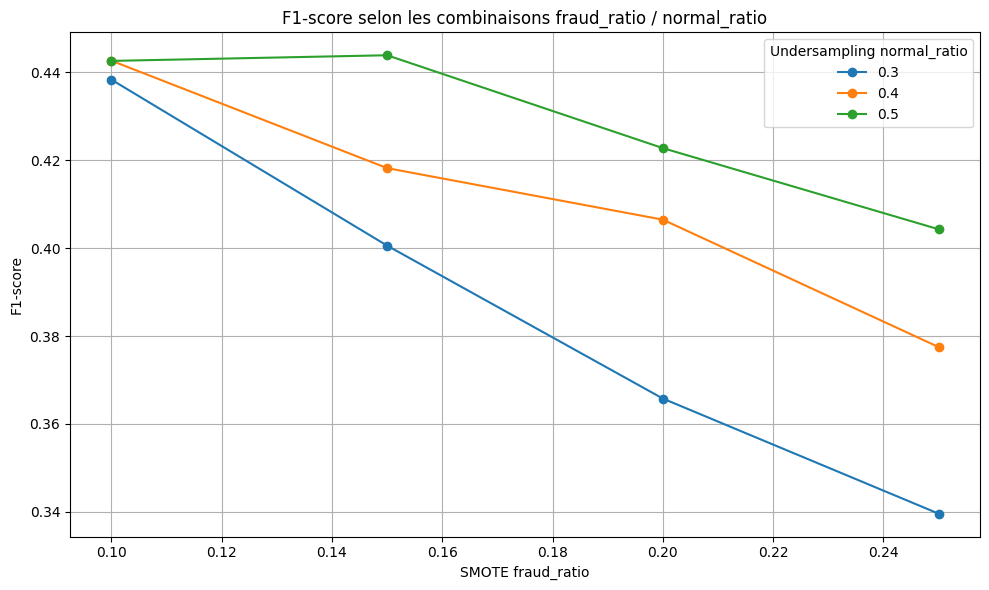

In [67]:
# 1. Séparer X et y à partir de data_train
X_train = train_encoded.drop(columns=["isFraud"])
y_train = train_encoded["isFraud"]


# Échantillonnage aléatoire pour la recherche de ratio
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=50000, stratify=y_train, random_state=42)

# Plages de ratios à tester
fraud_ratios = [0.10, 0.15, 0.20, 0.25]
normal_ratios = [0.5, 0.4, 0.3]


# Stocker les résultats
results = []

# Cross-validation stratifiée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Fonction F1-score
f1 = 'f1'

# Boucle sur les combinaisons
for fr in tqdm(fraud_ratios, desc="Fraud ratios"):
    for nr in normal_ratios:
        # Pipeline SMOTE + undersampling + modèle
        pipeline = ImbPipeline([
            ('smote', SMOTE(sampling_strategy=fr, random_state=42)),
            ('rus', RandomUnderSampler(sampling_strategy=nr, random_state=42)),
            ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
        ])
        
        # Évaluation F1-score avec CV
        scores = cross_val_score(pipeline, X_sample, y_sample, cv=cv, scoring=f1)
        mean_score = scores.mean()

        results.append({
            'fraud_ratio': fr,
            'normal_ratio': nr,
            'f1_score': mean_score
        })
        
# Convertir en DataFrame
results_df = pd.DataFrame(results)

# Afficher le tableau trié
print(results_df.sort_values(by="f1_score", ascending=False))

# Graphique
pivot = results_df.pivot(index='fraud_ratio', columns='normal_ratio', values='f1_score')
pivot.plot(kind='line', marker='o', figsize=(10,6))
plt.title('F1-score selon les combinaisons fraud_ratio / normal_ratio')
plt.ylabel('F1-score')
plt.xlabel('SMOTE fraud_ratio')
plt.legend(title='Undersampling normal_ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


### Meilleurs ratios

La meilleure combinaison de ratios est visiblement fraud_ratio=0.15 et normal_rati  qui est atteint pour un normal ratio de 0.5

In [69]:
# Récupérer les meilleurs ratios
best = results_df.sort_values(by="f1_score", ascending=False).iloc[0]
best_fraud_ratio = best["fraud_ratio"]
best_normal_ratio = best["normal_ratio"]

print(f"Meilleurs ratios : SMOTE = {best_fraud_ratio}, Undersampling = {best_normal_ratio}")

# Appliquer sur tout X_train pour constituer l’échantillon final
smote = SMOTE(sampling_strategy=best_fraud_ratio, random_state=42)
rus = RandomUnderSampler(sampling_strategy=best_normal_ratio, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

print("Répartition finale :", pd.Series(y_resampled).value_counts(normalize=True))


Meilleurs ratios : SMOTE = 0.15, Undersampling = 0.5
Répartition finale : 0    0.666667
1    0.333333
Name: isFraud, dtype: float64


In [71]:

# Si y_resampled est une ndarray ou Series
if not isinstance(y_resampled, pd.Series):
    y_resampled = pd.Series(y_resampled, name='isFraud')  # Remplace 'isFraud' par le nom de ta variable cible

# Fusion propre
X_resampled = X_resampled.reset_index(drop=True)
y_resampled = y_resampled.reset_index(drop=True)

train_2_resampled = pd.concat([X_resampled, y_resampled], axis=1)


#dimensions de Train_2_resampled
print("Dimensions du DataFrame final :", train_2_resampled.shape)
#entête de Train_2_resampled
print("En-tête du DataFrame final :")   
train_2_resampled.head()



Dimensions du DataFrame final : (205155, 330)
En-tête du DataFrame final :


,TransactionDT,TransactionAmt,dist1,C1,C2,C4,C5,C6,C7,C8,...,P_emaildomain_1_freq,P_emaildomain_2_freq,card1_addr1_freq,card1_freq,card2_freq,card3_freq,card5_freq,addr1_freq,addr2_freq,isFraud
0,7170669,29.00,15.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.174034,0.789589,0.000068,0.000643,0.010550,0.885012,0.097038,0.071159,0.881005,0
1,4967355,29.00,999.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.174034,0.789589,0.000030,0.000343,0.000516,0.885012,0.138606,0.014298,0.881005,0
2,5523375,22.97,7.0,3.0,2.0,0.0,2.0,1.0,0.0,0.0,...,0.160004,0.160840,0.000030,0.000030,0.005544,0.885012,0.138606,0.067555,0.881005,0
3,1040045,159.95,999.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.160004,0.160840,0.000040,0.000040,0.071178,0.885012,0.509015,0.011585,0.881005,0
4,1266362,49.00,12.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.387372,0.789589,0.000286,0.001664,0.010302,0.885012,0.043611,0.033939,0.881005,0


### Exportation des données rééchantillonnées

In [72]:
train_2_resampled.to_csv("data/train_resampled_init.csv", index=False) 
train_2_resampled.to_parquet("data/train_resampled_init_p.parquet", index=False)

In [73]:
# valeur manquantes dans le DataFrame final
print(train_2_resampled.isna().sum()[train_2_resampled.isna().sum() > 0])
print(X_resampled.isna().sum()[X_resampled.isna().sum() > 0])

print(y_resampled.isna().sum()[y_resampled.isna().sum() > 0])

Series([], dtype: int64)
Series([], dtype: int64)
[]


### Utiliser le ppscore sur les nouvelles données 
Afin de  choisir les variables à fort pouvoir prédictif, nous effectuons le ppscore

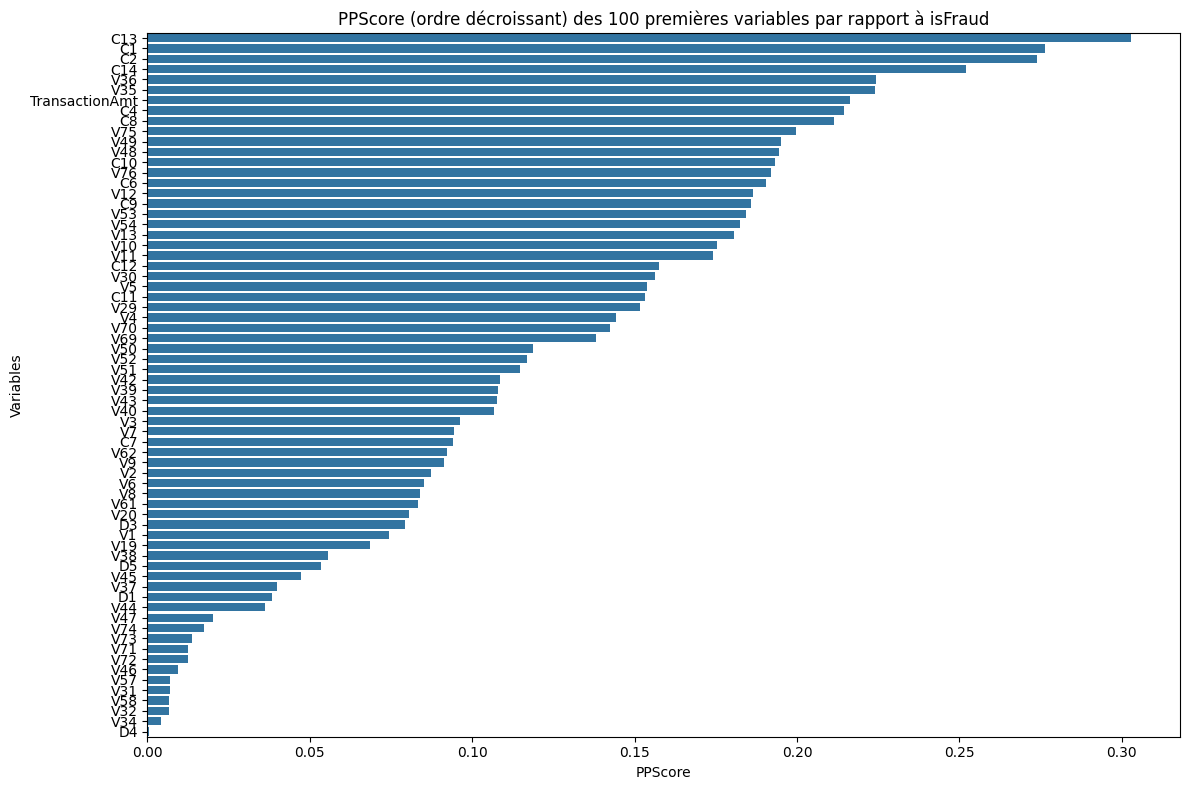

In [74]:
# Sélectionner les 100 premières colonnes sauf 'isFraud'
columns = [col for col in X_resampled.columns[:100] if col != "isFraud"]


# Calculer les PPS pour chaque variable par rapport à 'isFraud'
ppscore_df_1 = pd.DataFrame([
    pps.score(train_2_resampled, x=col, y= "isFraud" ) for col in columns
])

# Ne garder que les scores > 0
ppscore_df_1_filtered  = ppscore_df_1[ppscore_df_1["ppscore"] > 0]

# Afficher un message si aucune variable n'est informative
if ppscore_df_1_filtered.empty:
    print("Aucune variable parmi les 100 premières n'a un PPScore significatif pour prédire 'isFraud'.")
else:
    # Trier par ordre décroissant
    ppscore_df_1_sorted = ppscore_df_1_filtered.sort_values(by='ppscore', ascending=False)

    # Affichage graphique
    plt.figure(figsize=(12, 8))
    sns.barplot(x='ppscore', y='x', data=ppscore_df_1_sorted)
    plt.title('PPScore (ordre décroissant) des 100 premières variables par rapport à isFraud')
    plt.xlabel('PPScore')
    plt.ylabel('Variables')
    plt.tight_layout()
    plt.show()

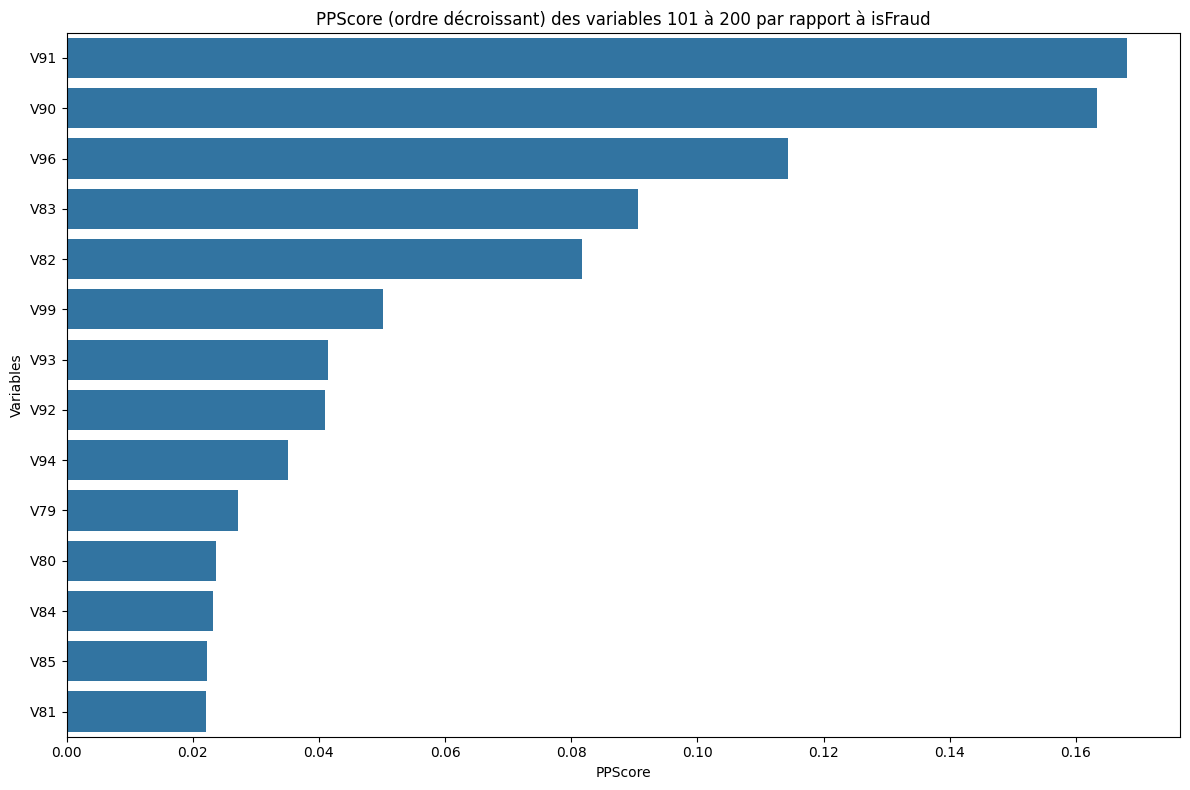

In [77]:
#faire les pscores pour les 100 variables à partir de 101
columns_101_200 = [col for col in train_2_resampled.columns[100:200] if col != "isFraud"]
# Calculer les PPS pour chaque variable par rapport à 'isFraud'

ppscore_df_101_200  = pd.DataFrame([
    pps.score(train_2_resampled, x=col, y= "isFraud" ) for col in columns_101_200
])

# Ne garder que les scores > 0
ppscore_df_101_200_filtered = ppscore_df_101_200[ppscore_df_101_200["ppscore"] > 0]
# Afficher un message si aucune variable n'est informative  
if ppscore_df_101_200_filtered.empty:
    print("Aucune variable parmi les 100 suivantes n'a un PPScore significatif pour prédire 'isFraud'.")
else:
    # Trier par ordre décroissant
    ppscore_df_101_200_sorted = ppscore_df_101_200_filtered.sort_values(by='ppscore', ascending=False)

    # Affichage graphique
    plt.figure(figsize=(12, 8))
    sns.barplot(x='ppscore', y='x', data=ppscore_df_101_200_sorted)
    plt.title('PPScore (ordre décroissant) des variables 101 à 200 par rapport à isFraud')
    plt.xlabel('PPScore')
    plt.ylabel('Variables')
    plt.tight_layout()
    plt.show()  

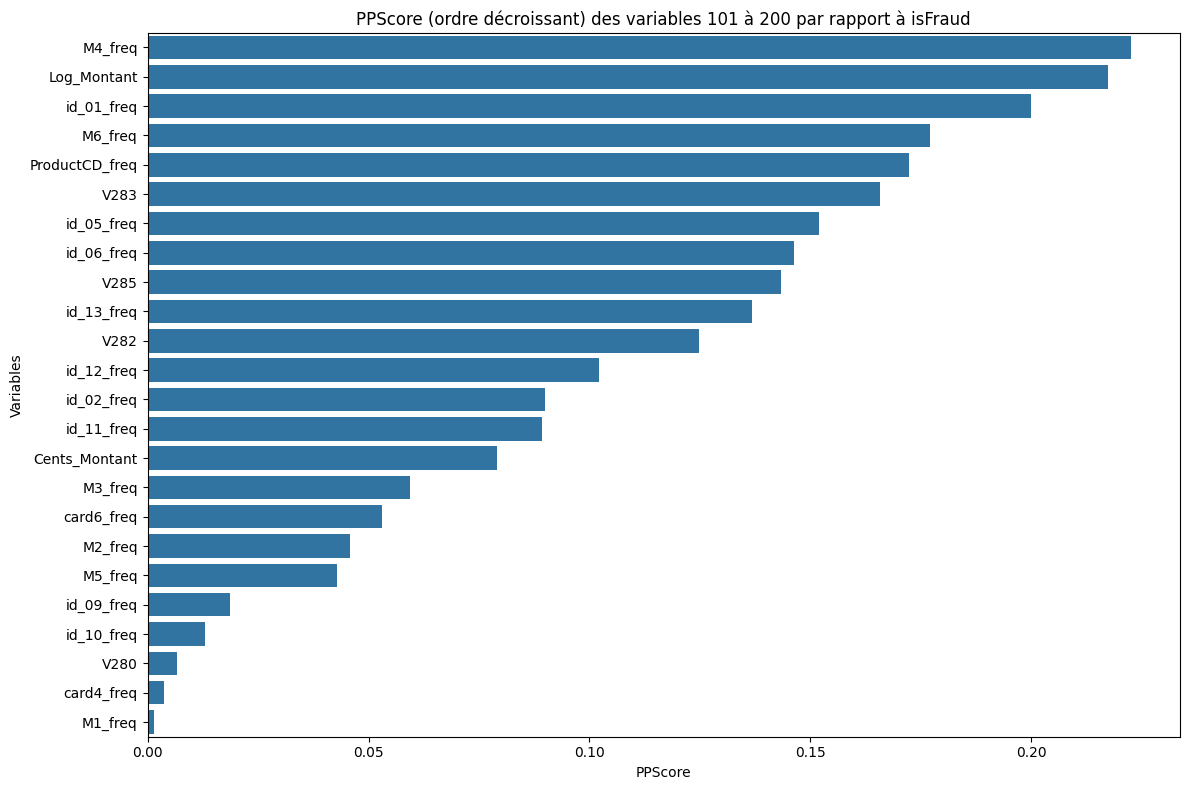

In [79]:
#faire les pscores pour les 100 variables à partir de 101
columns_201_300 = [col for col in train_2_resampled.columns[200:300] if col != "isFraud"]
# Calculer les PPS pour chaque variable par rapport à 'isFraud'

ppscore_df_201_300 = pd.DataFrame([
    pps.score(train_2_resampled, x=col, y= "isFraud" ) for col in columns_201_300
])
# Ne garder que les scores > 0
ppscore_df_201_300_filtered = ppscore_df_201_300[ppscore_df_201_300["ppscore"] > 0]
# Afficher un message si aucune variable n'est informative  
if ppscore_df_201_300_filtered.empty:
    print("Aucune variable parmi les 100 suivantes n'a un PPScore significatif pour prédire 'isFraud'.")
else:
    # Trier par ordre décroissant
    ppscore_df_201_300_sorted = ppscore_df_201_300_filtered.sort_values(by='ppscore', ascending=False)

    # Affichage graphique
    plt.figure(figsize=(12, 8))
    sns.barplot(x='ppscore', y='x', data=ppscore_df_201_300_sorted)
    plt.title('PPScore (ordre décroissant) des variables 101 à 200 par rapport à isFraud')
    plt.xlabel('PPScore')
    plt.ylabel('Variables')
    plt.tight_layout()
    plt.show()  

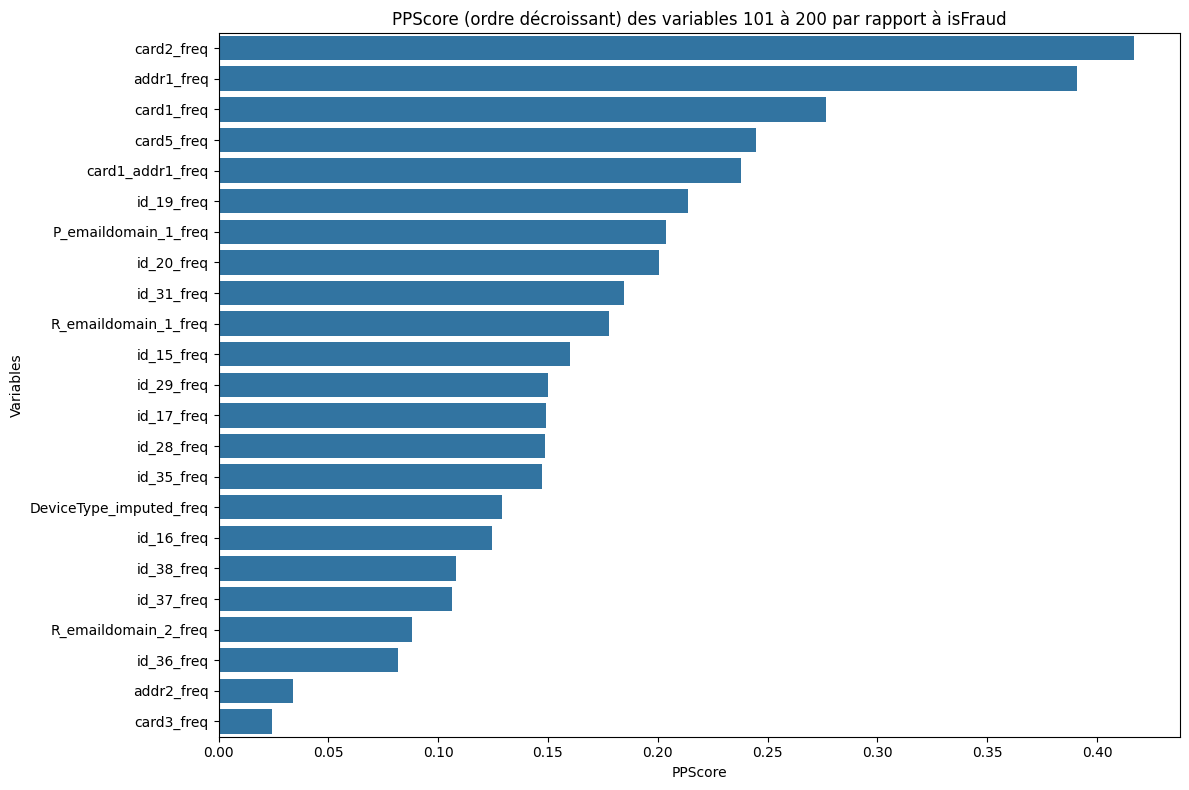

In [80]:
#faire les pscores pour les 100 variables à partir de 101
columns_300 = [col for col in train_2_resampled.columns[300:] if col != "isFraud"]
# Calculer les PPS pour chaque variable par rapport à 'isFraud'

ppscore_df_300 = pd.DataFrame([
    pps.score(train_2_resampled, x=col, y= "isFraud" ) for col in columns_300
])
 

# Ne garder que les scores > 0
ppscore_df_300_filtered = ppscore_df_300[ppscore_df_300["ppscore"] > 0]
# Afficher un message si aucune variable n'est informative  
if ppscore_df_300_filtered.empty:
    print("Aucune variable parmi les 100 suivantes n'a un PPScore significatif pour prédire 'isFraud'.")
else:
    # Trier par ordre décroissant
    ppscore_df_300_sorted = ppscore_df_300_filtered.sort_values(by='ppscore', ascending=False)

    # Affichage graphique
    plt.figure(figsize=(12, 8))
    sns.barplot(x='ppscore', y='x', data=ppscore_df_300_sorted)
    plt.title('PPScore (ordre décroissant) des variables 101 à 200 par rapport à isFraud')
    plt.xlabel('PPScore')
    plt.ylabel('Variables')
    plt.tight_layout()
    plt.show()  

In [81]:
# Regrouper tous les résultats de ppscore dans le même dataframe

# Concaténation verticale (empilement ligne par ligne)
ppscore_concat = pd.concat([
    ppscore_df_1,
    ppscore_df_101_200,
    ppscore_df_201_300,
    ppscore_df_300
], ignore_index=True)

# Vérification rapide
print(ppscore_concat.shape)
print(train_2_resampled.shape)
ppscore_concat.head()

(329, 9)
(205155, 330)


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,TransactionDT,isFraud,0.000000,regression,True,mean absolute error,0.3356,0.408800,DecisionTreeRegressor()
1,TransactionAmt,isFraud,0.216270,regression,True,mean absolute error,0.3356,0.263020,DecisionTreeRegressor()
2,dist1,isFraud,0.000000,regression,True,mean absolute error,0.3356,0.372842,DecisionTreeRegressor()
3,C1,isFraud,0.276396,regression,True,mean absolute error,0.3356,0.242842,DecisionTreeRegressor()
4,C2,isFraud,0.273848,regression,True,mean absolute error,0.3356,0.243696,DecisionTreeRegressor()


C:\Users\I7 7eme\AppData\Local\Temp\ipykernel_11536\2915253212.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ppscore_sorted, x='ppscore', y='x', palette='viridis', width=0.5)


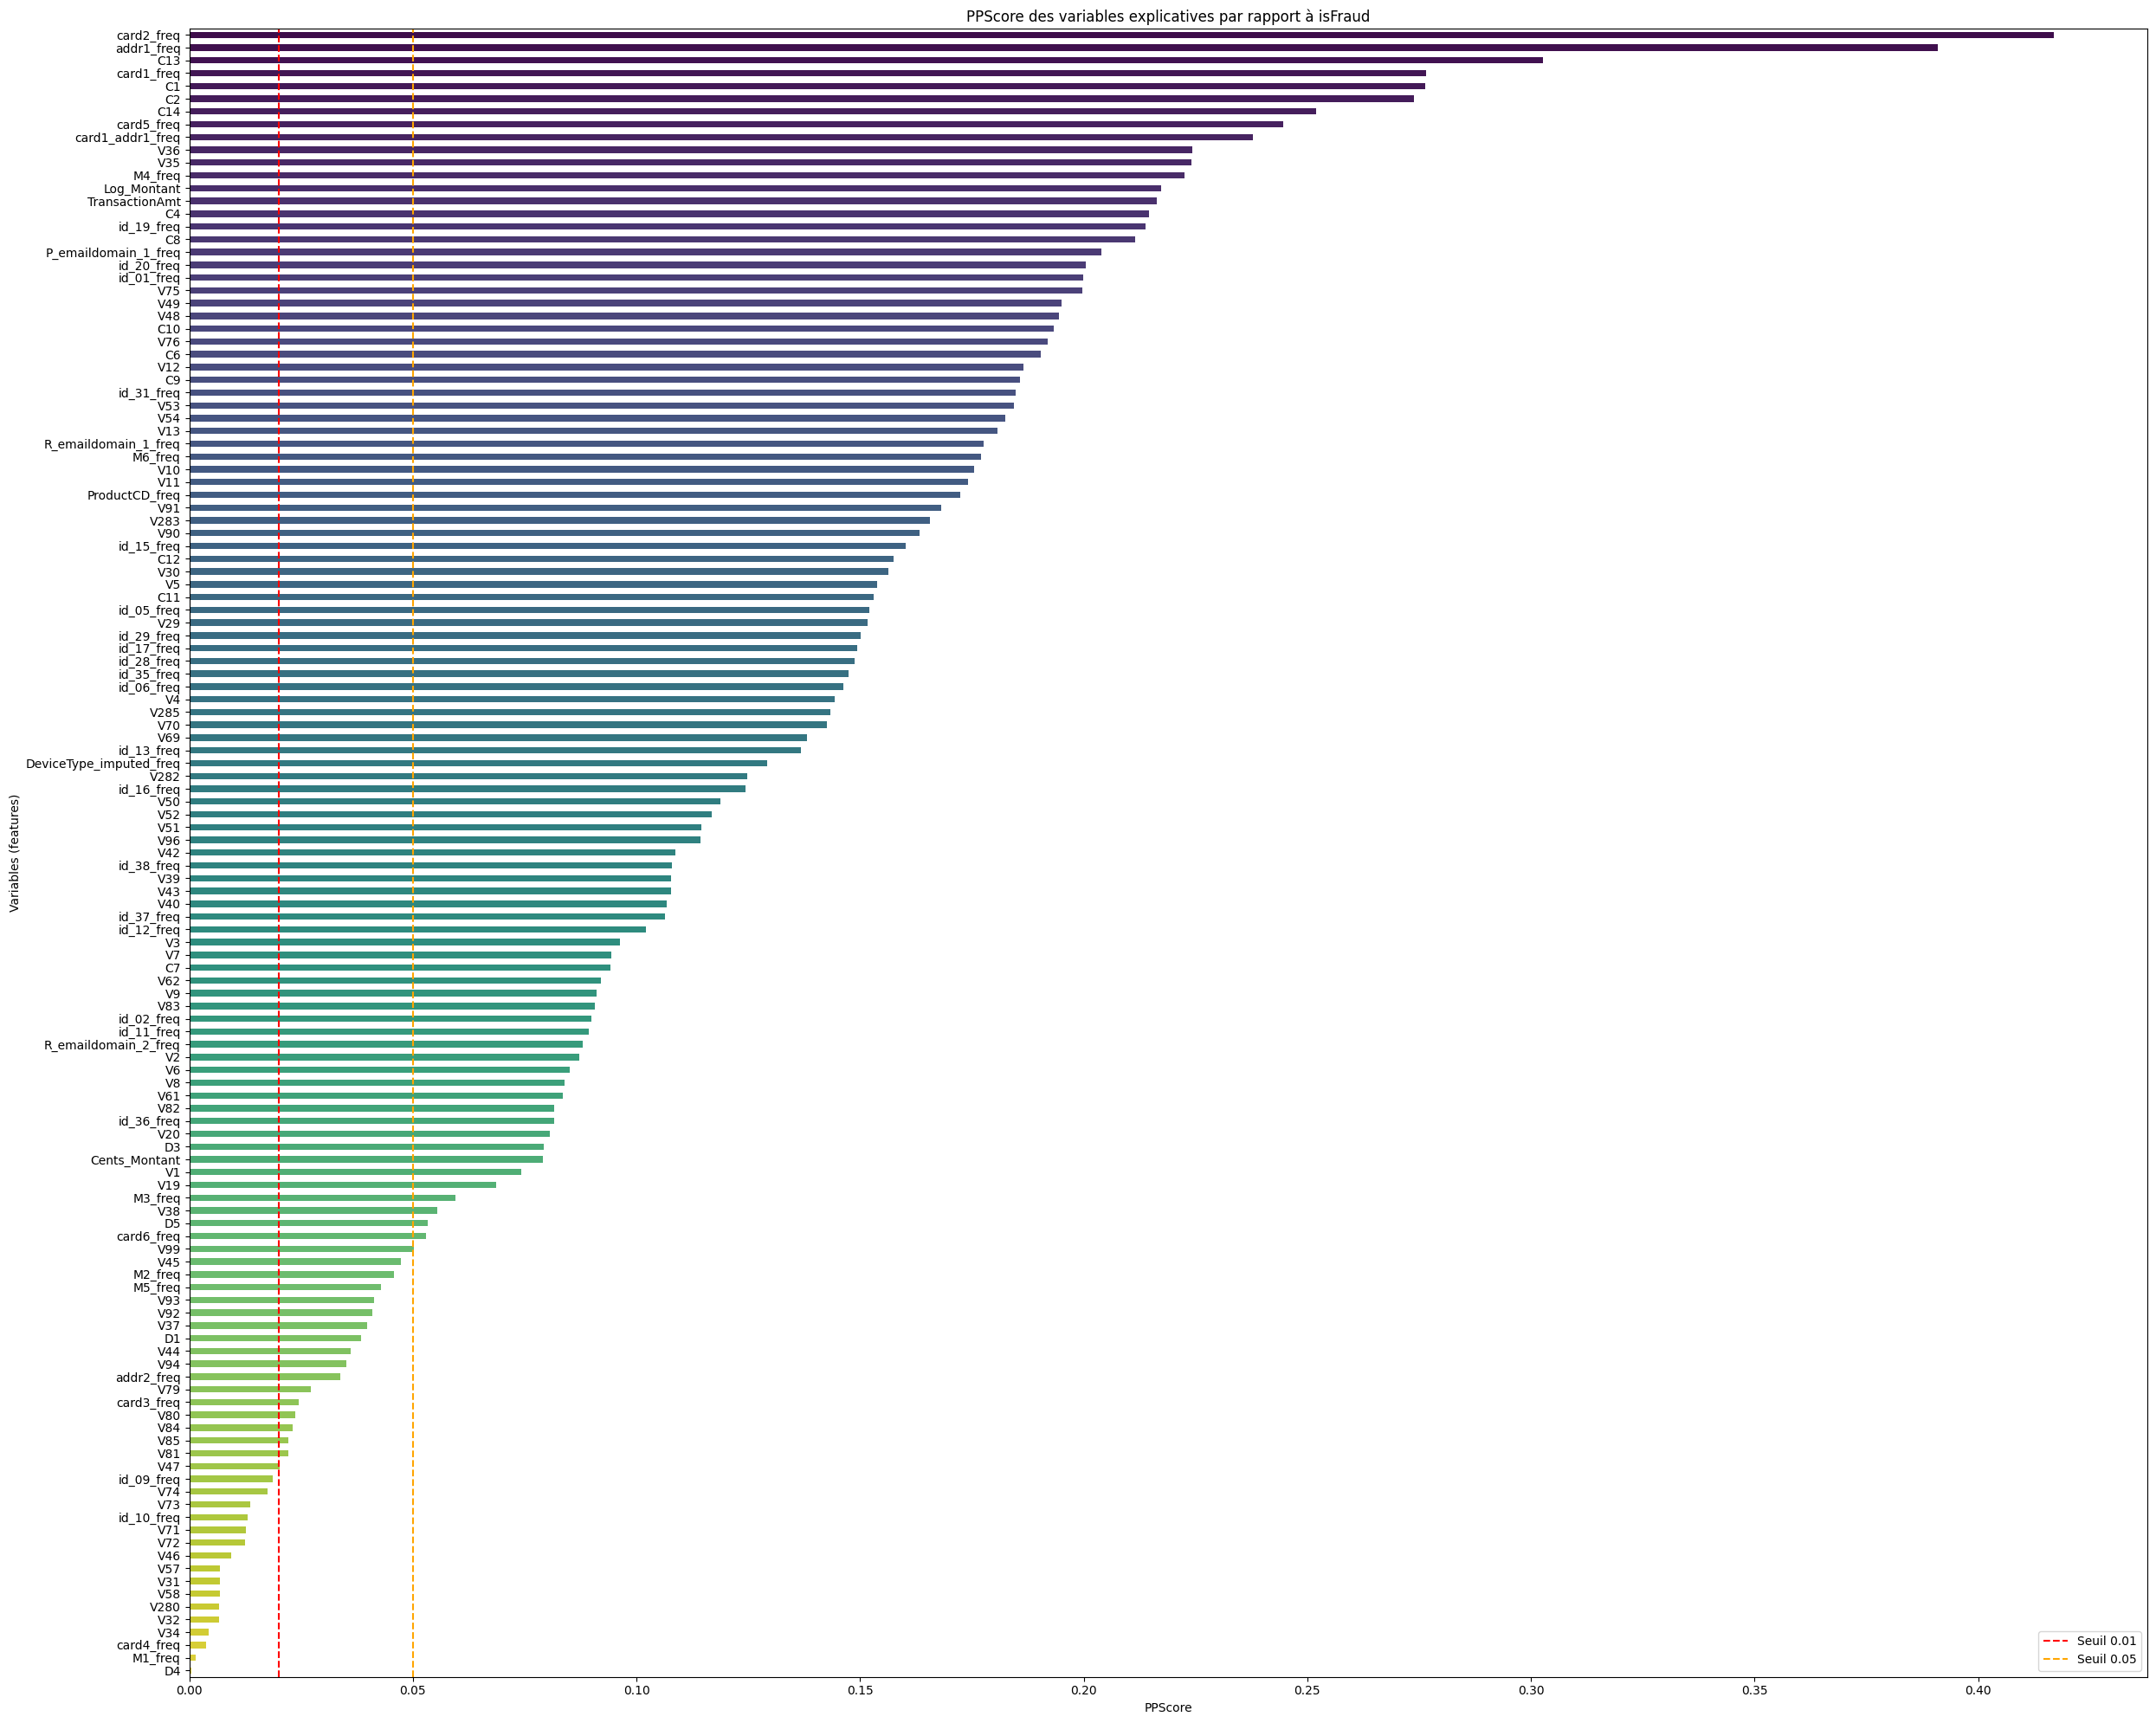

In [82]:


# Filtrer les variables avec un ppscore > 0
ppscore_filtered = ppscore_concat[ppscore_concat['ppscore'] > 0]

# Trier les variables par ppscore décroissant
ppscore_sorted = ppscore_filtered.sort_values(by='ppscore', ascending=False)

# Créer un graphique plus compact
plt.figure(figsize=(25, 20))  # largeur x hauteur (hauteur réduite)

# Tracer avec barres fines
sns.barplot(data=ppscore_sorted, x='ppscore', y='x', palette='viridis', width=0.5)

# Lignes de seuil
plt.axvline(0.02, color='red', linestyle='--', label='Seuil 0.01')
plt.axvline(0.05, color='orange', linestyle='--', label='Seuil 0.05')

plt.title('PPScore des variables explicatives par rapport à isFraud')
plt.xlabel('PPScore')
plt.ylabel('Variables (features)')
plt.legend()
plt.tight_layout()
plt.show()


Nous retenons toutes les variables dont le ppscore est strictement supérieur à 0.05


In [109]:
# Variables selectionnés au final (seuil 0.05)
seuil_ppscore = 0.05

# Garder les variables ayant un ppscore > 0.05
selected_vars = ppscore_concat[ppscore_concat['ppscore'] > seuil_ppscore]['x'].tolist()

print(f"Nombre de variables retenues : {len(selected_vars)}")


Nombre de variables retenues : 96


### Base réduite après ppscore


In [110]:
train_after_pps = train_2_resampled[selected_vars]
print(train_after_pps.shape)
train_after_pps.head()

(205155, 96)


,TransactionAmt,C1,C2,C4,C6,C7,C8,C9,C10,C11,...,id_38_freq,DeviceType_imputed_freq,R_emaildomain_1_freq,R_emaildomain_2_freq,P_emaildomain_1_freq,card1_addr1_freq,card1_freq,card2_freq,card5_freq,addr1_freq
0,29.00,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.760632,0.76095,0.766747,0.76691,0.174034,0.000068,0.000643,0.010550,0.097038,0.071159
1,29.00,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.760632,0.76095,0.766747,0.76691,0.174034,0.000030,0.000343,0.000516,0.138606,0.014298
2,22.97,3.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,...,0.760632,0.76095,0.766747,0.76691,0.160004,0.000030,0.000030,0.005544,0.138606,0.067555
3,159.95,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.760632,0.76095,0.766747,0.76691,0.160004,0.000040,0.000040,0.071178,0.509015,0.011585
4,49.00,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.760632,0.76095,0.766747,0.76691,0.387372,0.000286,0.001664,0.010302,0.043611,0.033939


In [111]:
# Les variables en V qui sont dans la base
variables_V = [col for col in train_after_pps.columns if col.startswith("V")]
print(variables_V)
print("Nombre de variables en V:", len(variables_V))




['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V19', 'V20', 'V29', 'V30', 'V35', 'V36', 'V38', 'V39', 'V40', 'V42', 'V43', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V61', 'V62', 'V69', 'V70', 'V75', 'V76', 'V82', 'V83', 'V90', 'V91', 'V96', 'V99', 'V282', 'V283', 'V285']
Nombre de variables en V: 46


In [112]:
# Créer la liste des variables C1 à C14, sauf C5
variables_C = [f"C{i}" for i in range(1, 15) if f"C{i}" in train_after_pps.columns and f"C{i}" != "C5"]

print("Nombre de variables en C (sans C5):", len(variables_C))
print(variables_C)


Nombre de variables en C (sans C5): 12
['C1', 'C2', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']


### Les autres variables 

Variables qui ne sont ni en C ni en V : 38
['TransactionAmt', 'D3', 'D5', 'Log_Montant', 'Cents_Montant', 'ProductCD_freq', 'card6_freq', 'M3_freq', 'M4_freq', 'M6_freq', 'id_01_freq', 'id_02_freq', 'id_05_freq', 'id_06_freq', 'id_11_freq', 'id_12_freq', 'id_13_freq', 'id_15_freq', 'id_16_freq', 'id_17_freq', 'id_19_freq', 'id_20_freq', 'id_28_freq', 'id_29_freq', 'id_31_freq', 'id_35_freq', 'id_36_freq', 'id_37_freq', 'id_38_freq', 'DeviceType_imputed_freq', 'R_emaildomain_1_freq', 'R_emaildomain_2_freq', 'P_emaildomain_1_freq', 'card1_addr1_freq', 'card1_freq', 'card2_freq', 'card5_freq', 'addr1_freq']
nombre de variables en V: (205155, 46)


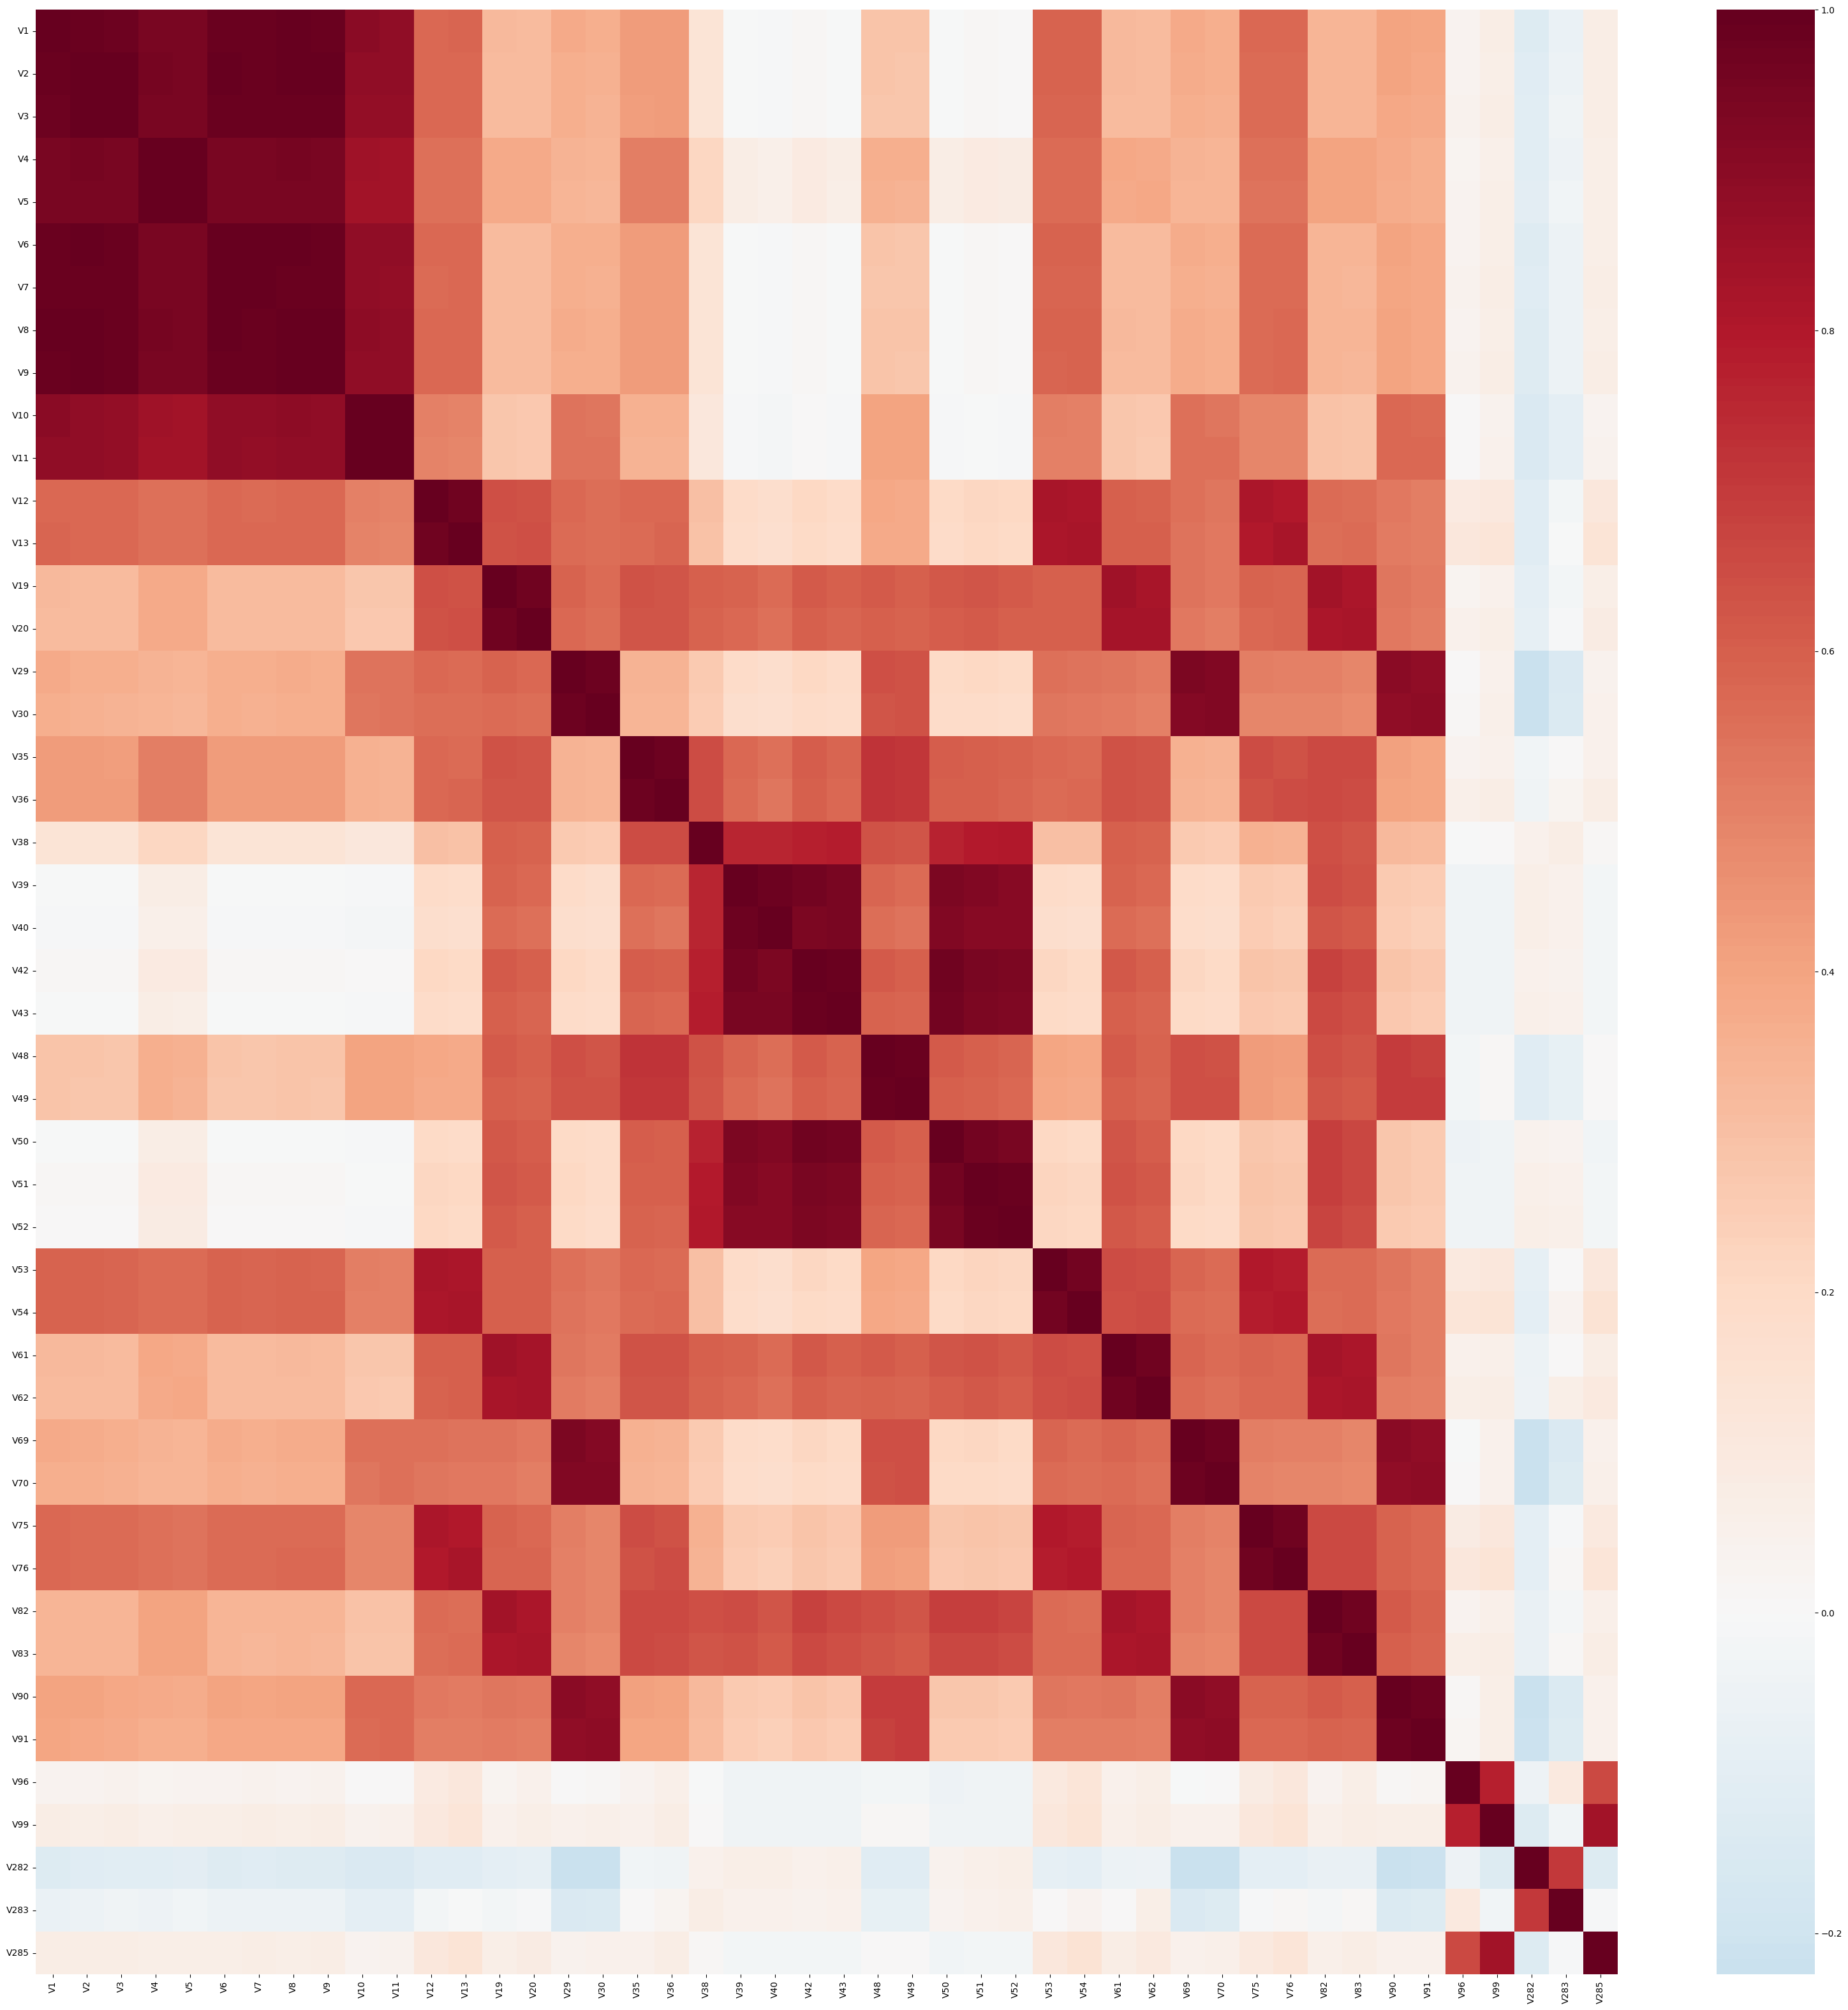

In [113]:

variables_CV = set(variables_C + variables_V)

#  Variables qui ne sont ni en C ni en V
autres_variables = [col for col in train_after_pps.columns if col not in variables_CV]

# Affichage
print("Variables qui ne sont ni en C ni en V :", len(autres_variables))
print(autres_variables)


print("nombre de variables en V:", train_after_pps[variables_V].shape)



plt.figure(figsize=(40, 40))
sns.heatmap(
    df_train[variables_V].corr(), #Sur les données originales
    cmap='RdBu_r',
    annot=False,
    center=0.0
)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

### Suppresion de certaines variables  en V grace aux correlations

In [114]:
def filter_correlated_features(X, ppscores, threshold=0.9, correlation_method='spearman'):
    """
    Identifie et supprime les variables redondantes en conservant celle avec le PPScore le plus élevé dans chaque groupe corrélé.

    Paramètres:
    -----------
    X : pd.DataFrame
        DataFrame contenant les variables à analyser.
    ppscores : pd.DataFrame
        DataFrame avec les colonnes 'feature' et 'ppscore'.
    threshold : float (défaut=0.9)
        Seuil de corrélation pour définir la redondance.
    correlation_method : str ('pearson', 'spearman')
        Méthode de calcul de la corrélation.

    Retourne:
    --------
    dict:
        - 'variables_gardees': Liste des variables conservées.
        - 'variables_supprimees': Liste des variables supprimées.
        - 'rapport': Détails des groupes et décisions.
        - 'X_filtre': DataFrame filtré.
    """
    # 1. Matrice de corrélation
    corr_matrix = X.corr(method=correlation_method).abs()

    # 2. Groupes de variables corrélées
    groups = []
    visited = set()
    for col in corr_matrix.columns:
        if col not in visited:
            correlated = list(corr_matrix[col][corr_matrix[col] > threshold].index)
            if len(correlated) > 1:
                groups.append(correlated)
                visited.update(correlated)

    # 3. Sélection par PPScore
    variables_gardees = []
    variables_supprimees = []
    rapport = []

    for group in groups:
        pps_group = ppscores[ppscores['x'].isin(group)] #x est le nom de la colonnes des variables dans ppscore
        best_feature = pps_group.loc[pps_group['ppscore'].idxmax(), 'x']
        variables_gardees.append(best_feature)
        variables_supprimees.extend([v for v in group if v != best_feature])

        for var in group:
            rapport.append({
                'Groupe': ', '.join(group),
                'Variable': var,
                'PPScore': pps_group.loc[pps_group['x'] == var, 'ppscore'].values[0],
                f'Corrélation avec {best_feature}': corr_matrix.loc[var, best_feature],
                'Conservée': var == best_feature
                
            })

    # 4. Ajout des variables non corrélées
    variables_non_correlées = list(set(X.columns) - set(variables_gardees) - set(variables_supprimees))
    variables_gardees += variables_non_correlées

    # 5. DataFrame filtré
    X_filtre = X[variables_gardees]

    return {
        'variables_gardees': variables_gardees,
        'variables_supprimees': variables_supprimees,
        'rapport': pd.DataFrame(rapport),
        'X_filtre': X_filtre,
        'groups':groups
    }
    

Pour tout groupe de variable en V dont la correlation atteint 0.8, on conserve juste celle ayant le plus grand ppscore

In [115]:

resultats_V = filter_correlated_features(
    X=train_after_pps[variables_V],
    ppscores=ppscore_concat,
    threshold=0.8,
    correlation_method='spearman'
)

In [116]:
# Récupération directe des résultats
V_gardees = resultats_V['variables_gardees']
V_supprimees = resultats_V['variables_supprimees']


print("nombre de V gardées:", len(V_gardees ))
print("Les variables V gardées:", V_gardees )
print("nombre de V supprimées:", len(V_supprimees) )
print("Les variables V supprimées:", V_supprimees )


nombre de V gardées: 13
Les variables V gardées: ['V10', 'V12', 'V61', 'V91', 'V36', 'V50', 'V49', 'V53', 'V62', 'V75', 'V96', 'V283', 'V285']
nombre de V supprimées: 35
Les variables V supprimées: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V11', 'V13', 'V19', 'V20', 'V82', 'V29', 'V30', 'V69', 'V70', 'V90', 'V35', 'V38', 'V39', 'V40', 'V42', 'V43', 'V51', 'V52', 'V48', 'V54', 'V20', 'V61', 'V83', 'V76', 'V99', 'V282']


On a au final 15 variables en V gardées après selection de la  variable à plus fort pouvoir prédictif dans chaque groupe de variables très correlés (seuil de 0.8) et les groupes correlées créés coincident bien avec les observations sur la matrice de correlation

### Suppresion de certaines variables  c1-c14 grace aux correlations

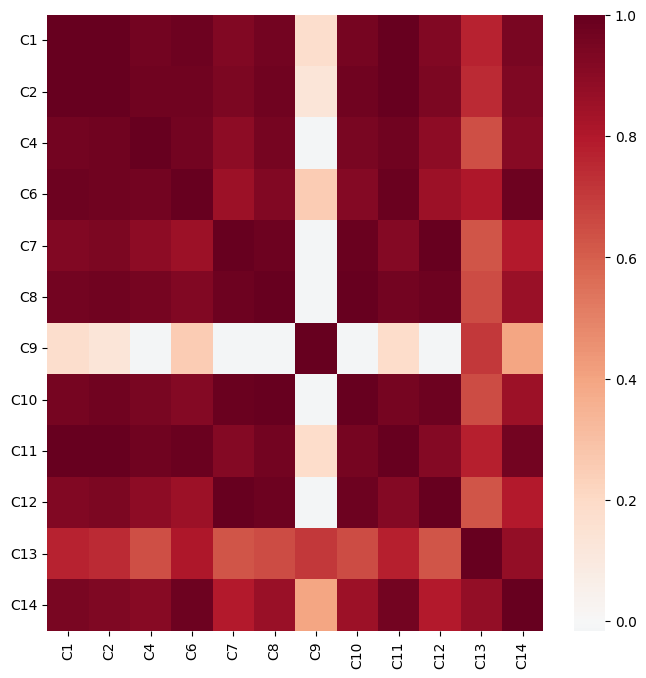

In [117]:

plt.figure(figsize=(8,8))
sns.heatmap(
    df_train[variables_C].corr(),
    cmap='RdBu_r',
    annot=False,
    center=0.0
)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [118]:
resultats_C = filter_correlated_features(
    X=train_after_pps[variables_C],
    ppscores=ppscore_concat,
    threshold=0.8,
    correlation_method='spearman'
)

In [119]:
# Récupération directe des résultats
C_gardees = resultats_C['variables_gardees']
C_supprimees = resultats_C['variables_supprimees']


print("nombre de variables en C gardées:", len(C_gardees ))
print("Les variables en C gardées:", C_gardees )
print("nombre de variables en C  supprimées:", len(C_supprimees) )
print("Les variables en C supprimées:", C_supprimees )


nombre de variables en C gardées: 7
Les variables en C gardées: ['C2', 'C4', 'C12', 'C13', 'C9', 'C1', 'C6']
nombre de variables en C  supprimées: 5
Les variables en C supprimées: ['C11', 'C8', 'C10', 'C7', 'C14']


On a au final 7 variables en C gardées après selection de la  variable à plus fort pouvoir prédictif dans chaque groupe de variables très correlés (seuil de 0.8) et les groupes correlées créés coincident bien avec les observations sur la matrice de correlation

### Etat actuel du train actuels

In [120]:
#variables prêtes pour le modèle
var_train_actu_clean =  C_gardees + V_gardees 


#  Variables qui ne sont ni en C ni en V
autres_variables = [col for col in train_after_pps.columns if col not in variables_CV]
print("variables non prêtes:", autres_variables )

#var_actuelles 
var_train_actu = var_train_actu_clean + autres_variables

var_train_actu

#train_actuel= train_after_pps[var_train_actu]

#train_actuel.to_parquet("data/train_12_56_V_et_C_pret_parquet.parquet")


variables non prêtes: ['TransactionAmt', 'D3', 'D5', 'Log_Montant', 'Cents_Montant', 'ProductCD_freq', 'card6_freq', 'M3_freq', 'M4_freq', 'M6_freq', 'id_01_freq', 'id_02_freq', 'id_05_freq', 'id_06_freq', 'id_11_freq', 'id_12_freq', 'id_13_freq', 'id_15_freq', 'id_16_freq', 'id_17_freq', 'id_19_freq', 'id_20_freq', 'id_28_freq', 'id_29_freq', 'id_31_freq', 'id_35_freq', 'id_36_freq', 'id_37_freq', 'id_38_freq', 'DeviceType_imputed_freq', 'R_emaildomain_1_freq', 'R_emaildomain_2_freq', 'P_emaildomain_1_freq', 'card1_addr1_freq', 'card1_freq', 'card2_freq', 'card5_freq', 'addr1_freq']


['C2',
 'C4',
 'C12',
 'C13',
 'C9',
 'C1',
 'C6',
 'V10',
 'V12',
 'V61',
 'V91',
 'V36',
 'V50',
 'V49',
 'V53',
 'V62',
 'V75',
 'V96',
 'V283',
 'V285',
 'TransactionAmt',
 'D3',
 'D5',
 'Log_Montant',
 'Cents_Montant',
 'ProductCD_freq',
 'card6_freq',
 'M3_freq',
 'M4_freq',
 'M6_freq',
 'id_01_freq',
 'id_02_freq',
 'id_05_freq',
 'id_06_freq',
 'id_11_freq',
 'id_12_freq',
 'id_13_freq',
 'id_15_freq',
 'id_16_freq',
 'id_17_freq',
 'id_19_freq',
 'id_20_freq',
 'id_28_freq',
 'id_29_freq',
 'id_31_freq',
 'id_35_freq',
 'id_36_freq',
 'id_37_freq',
 'id_38_freq',
 'DeviceType_imputed_freq',
 'R_emaildomain_1_freq',
 'R_emaildomain_2_freq',
 'P_emaildomain_1_freq',
 'card1_addr1_freq',
 'card1_freq',
 'card2_freq',
 'card5_freq',
 'addr1_freq']

### réduction des variables id

Pour ce faire, nous allons nous baser sur les ppscores des id encodées (id_xx_freq) et supprimer certains id encodées   en nous basant sur les corrrelations des variables  id_xx  (chi2 car celles qui restent sont toutes catégorielles) et dans chaque groupe d'id_xx très correlés, on va conserver celui dont id_xx_freq a plus grand ppscore. 

In [121]:
# Récupérer toutes les colonnes id_xx_freq du dataframe
id_freq_vars = [col for col in train_after_pps.columns if col.endswith('_freq') and col.startswith('id_')]

# Extraire les noms id_xx correspondants (en retirant le suffixe _freq)
var_id = [col.replace('_freq', '') for col in id_freq_vars]

print(f"Nombre de variables id_xx trouvées: {len(var_id)}")
print("Liste des variables id_xx:")
print(var_id)

Nombre de variables id_xx trouvées: 19
Liste des variables id_xx:
['id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_12', 'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38']


In [138]:
def cramers_v(x, y):
    """Calcule le V de Cramér entre deux variables catégorielles.
       Retourne 1 si x et y sont identiques, 0 si une des deux a une seule modalité.
    """
    try:
        if x.equals(y):
            return 1.0  # Cas où x et y sont identiques

        confusion_matrix = pd.crosstab(x, y)

        # Trop peu de modalités pour un test pertinent
        if confusion_matrix.shape[0] == 1 or confusion_matrix.shape[1] == 1:
            return 0.0

        chi2, _, _, _ = chi2_contingency(confusion_matrix)
        n = confusion_matrix.sum().sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape

        # Correction de biais selon Bergsma (2013)
        phi2_corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
        r_corr = r - ((r - 1) ** 2) / (n - 1)
        k_corr = k - ((k - 1) ** 2) / (n - 1)

        return np.sqrt(phi2_corr / min((k_corr - 1), (r_corr - 1)))
    
    except Exception as e:
        print(f"Erreur avec {x.name} vs {y.name} : {e}")
        return np.nan


def filter_correlated_id_variables(TRAIN2, ppscore_concat, var_id, threshold=0.9):
    """
    Filtre les variables ID catégorielles selon V de Cramér et PPS.
    """
    # Matrice du V de Cramér
    n = len(var_id)
    cramer_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i <= j:
                cramer_matrix[i, j] = cramers_v(df_train[var_id[i]], df_train[var_id[j]]) #sur les données originales
                cramer_matrix[j, i] = cramer_matrix[i, j]

    cramer_df = pd.DataFrame(cramer_matrix, index=var_id, columns=var_id)
    
    # Identifier les groupes de variables corrélées
    groups = []
    visited = set()
    for col in cramer_df.columns:
        if col not in visited:
            correlated = list(cramer_df[col][cramer_df[col] > threshold].index)
            if len(correlated) > 1:
                groups.append(correlated)
                visited.update(correlated)

    variables_gardees = []
    id_xx_gardees = []
    variables_supprimees = []
    rapport = []
    all_processed_vars = set()

    non_correlated = list(set(var_id) - visited)
    id_xx_gardees.extend(non_correlated)
    variables_gardees.extend([f"{id_var}_freq" for id_var in non_correlated])
    all_processed_vars.update(non_correlated)

    for group in groups:
        all_processed_vars.update(group)
        freq_vars = [f"{id_var}_freq" for id_var in group]
        pps_group = ppscore_concat[ppscore_concat['x'].isin(freq_vars)]

        if len(pps_group) == 0:
            continue

        best_freq = pps_group.loc[pps_group['ppscore'].idxmax(), 'x']
        best_id = best_freq.replace('_freq', '')

        id_xx_gardees.append(best_id)
        variables_gardees.append(best_freq)
        variables_supprimees.extend([f"{id_var}_freq" for id_var in group if id_var != best_id])

        for id_var in group:
            freq_var = f"{id_var}_freq"
            ppscore = (
                ppscore_concat.loc[ppscore_concat['x'] == freq_var, 'ppscore'].values[0]
                if freq_var in ppscore_concat['x'].values
                else np.nan
            )
            rapport.append({
                'Groupe': ', '.join(group),
                'id_xx': id_var,
                'id_xx_freq': freq_var,
                'PPScore': ppscore,
                'V_de_Cramer': cramer_df.loc[group[0], id_var],
                'Conservée': id_var == best_id
            })

    print(f"Variables initiales: {len(var_id)}")
    print(f"Variables traitées (uniques): {len(all_processed_vars)}")
    print(f"Variables gardées: {len(id_xx_gardees)}")
    print(f"Variables supprimées uniques: {len(set(var_id) - set(id_xx_gardees))}")

    X_filtre = TRAIN2[[col for col in TRAIN2.columns if col in variables_gardees]]

    return {
        'variables_gardees': variables_gardees,
        'id_xx_gardees': id_xx_gardees,
        'variables_supprimees': variables_supprimees,
        'rapport': pd.DataFrame(rapport),
        'X_filtre': X_filtre,
        'groups': groups,
        'cramer_matrix': cramer_df,
        'debug_counts': {
            'initial_vars': len(var_id),
            'processed_vars': len(all_processed_vars),
            'kept_vars': len(id_xx_gardees),
            'removed_vars': len(set(var_id) - set(id_xx_gardees))
        }
    }


In [139]:
resultats_id = filter_correlated_id_variables(df_parquet, ppscore_concat, var_id, threshold=0.8)

Variables initiales: 19
Variables traitées (uniques): 19
Variables gardées: 11
Variables supprimées uniques: 8


In [140]:
# Récupération directe des résultats
id_gardees = resultats_id['variables_gardees']
id_supprimees = resultats_id['variables_supprimees']


print("nombre de variables id gardées:", len(id_gardees ))
print("Les variables id_freq gardées:", id_gardees )
print("nombre de variables id  supprimées:", len(id_supprimees) )
print("Les variables id supprimées:", id_supprimees )

resultats_id


nombre de variables id gardées: 11
Les variables id_freq gardées: ['id_11_freq', 'id_13_freq', 'id_01_freq', 'id_05_freq', 'id_06_freq', 'id_12_freq', 'id_15_freq', 'id_20_freq', 'id_19_freq', 'id_31_freq', 'id_38_freq']
nombre de variables id  supprimées: 16
Les variables id supprimées: ['id_02_freq', 'id_02_freq', 'id_02_freq', 'id_02_freq', 'id_02_freq', 'id_16_freq', 'id_28_freq', 'id_29_freq', 'id_37_freq', 'id_17_freq', 'id_35_freq', 'id_35_freq', 'id_02_freq', 'id_36_freq', 'id_37_freq', 'id_02_freq']


{'variables_gardees': ['id_11_freq',
  'id_13_freq',
  'id_01_freq',
  'id_05_freq',
  'id_06_freq',
  'id_12_freq',
  'id_15_freq',
  'id_20_freq',
  'id_19_freq',
  'id_31_freq',
  'id_38_freq'],
 'id_xx_gardees': ['id_11',
  'id_13',
  'id_01',
  'id_05',
  'id_06',
  'id_12',
  'id_15',
  'id_20',
  'id_19',
  'id_31',
  'id_38'],
 'variables_supprimees': ['id_02_freq',
  'id_02_freq',
  'id_02_freq',
  'id_02_freq',
  'id_02_freq',
  'id_16_freq',
  'id_28_freq',
  'id_29_freq',
  'id_37_freq',
  'id_17_freq',
  'id_35_freq',
  'id_35_freq',
  'id_02_freq',
  'id_36_freq',
  'id_37_freq',
  'id_02_freq'],
 'rapport':                                       Groupe  id_xx  id_xx_freq   PPScore  \
 0                               id_01, id_02  id_01  id_01_freq  0.199895   
 1                               id_01, id_02  id_02  id_02_freq  0.089907   
 2                               id_02, id_05  id_02  id_02_freq  0.089907   
 3                               id_02, id_05  id_05  id_05

On retient donc 10 variables d'id retenus en conformité avec la matrice des V de cramer ci-dessous.

### Etat actuel des variables de train

In [141]:
#Récupère toutes les colonnes ID_freq
var_id_freq = [col for col in train_after_pps.columns 
               if col.startswith('id_') and col.endswith('_freq')]


#variables prêtes pour le modèle
var_train_actu_clean =  set(C_gardees + V_gardees + id_gardees)

print(var_train_actu_clean)

#Variable gérées
Var_gerees = list(var_id_freq ) + list(variables_CV)

#  Variables qui ne sont ni en C ni en V
autres_variables = [col for col in train_after_pps.columns if col not in Var_gerees]
print("variables non prêtes:", autres_variables )

#var_actuelles 
var_train_actu = list(var_train_actu_clean ) + list(autres_variables)

var_train_actu

train_actuel= train_after_pps[var_train_actu]

#print("variables de train actuelles:",train_actuel.columns)

#train_actuel.to_parquet("data/train_12_56_V_et_C_pret_parquet.parquet")

{'C2', 'id_06_freq', 'V50', 'id_20_freq', 'V61', 'V10', 'V53', 'id_13_freq', 'id_38_freq', 'C4', 'V96', 'id_31_freq', 'C9', 'id_05_freq', 'id_01_freq', 'id_11_freq', 'id_19_freq', 'id_12_freq', 'id_15_freq', 'V49', 'C12', 'C13', 'V285', 'V91', 'V75', 'V283', 'C1', 'C6', 'V62', 'V12', 'V36'}
variables non prêtes: ['TransactionAmt', 'D3', 'D5', 'Log_Montant', 'Cents_Montant', 'ProductCD_freq', 'card6_freq', 'M3_freq', 'M4_freq', 'M6_freq', 'DeviceType_imputed_freq', 'R_emaildomain_1_freq', 'R_emaildomain_2_freq', 'P_emaildomain_1_freq', 'card1_addr1_freq', 'card1_freq', 'card2_freq', 'card5_freq', 'addr1_freq']


## Cas des variables 'R_emaildomain_1_freq', 'R_emaildomain_2_freq', 'P_emaildomain_1_freq'

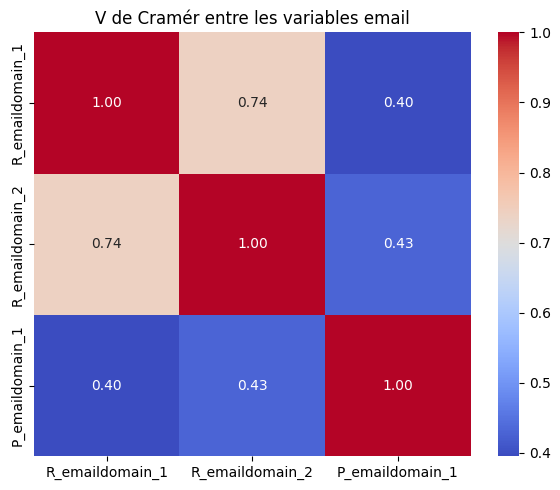

In [143]:
# Liste des variables à tester
email_vars = ['R_emaildomain_1', 'R_emaildomain_2', 'P_emaildomain_1']

def cramers_v_matrix(TRAIN2, vars):
    # Matrice vide (déplacée à l'intérieur de la fonction)
    cramers_matrix = pd.DataFrame(index=vars, columns=vars)
    
    # Calcul du V de Cramér
    for var1 in vars:
        for var2 in vars:
            if var1 == var2:
                cramers_matrix.loc[var1, var2] = 1.0
            else:
                v = cramers_v(TRAIN2[var1], TRAIN2[var2])  
                cramers_matrix.loc[var1, var2] = round(v, 4)
    
    return cramers_matrix.astype(float)

cramer_matrix = cramers_v_matrix(df_train, email_vars)

# Affichage de la heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cramer_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("V de Cramér entre les variables email")
plt.tight_layout()
plt.show()

In [144]:
 #Liste des variables à analyser
variables = ['R_emaildomain_1_freq', 'R_emaildomain_2_freq', 'P_emaildomain_1_freq']

# Filtrage et affichage direct
print(ppscore_concat[ppscore_concat['x'].isin(variables)][['x', 'ppscore']])

                        x   ppscore
318  R_emaildomain_1_freq  0.177688
319  R_emaildomain_2_freq  0.087886
320  P_emaildomain_1_freq  0.203864


Puisque R_email_domain_2_freq est bien correlé à R_emaildomain_1_freq et a un ppscore très faible, on ne va choisir que R_email_domain_1 et P_email_domain_1

### Cas des variables 'card1_addr1_freq', 'card1_freq', 'card2_freq', 'card5_freq', 'addr1_freq'

In [145]:
card_addr = ['card1_addr1_freq', 'card1_freq', 'card2_freq', 'card5_freq', 'addr1_freq']
# Filtrage et affichage direct
pps_card_addr = (ppscore_concat[ppscore_concat['x'].isin(card_addr)]
             [['x', 'ppscore']]
             .sort_values('ppscore', ascending=False))
pps_card_addr


,x,ppscore
324,card2_freq,0.416956
327,addr1_freq,0.390892
323,card1_freq,0.276552
326,card5_freq,0.244542
322,card1_addr1_freq,0.237893


La variable card1_addr1_freq	a certe un faible ppscore par rapport à card2_freq et addr1_freq mais son ppscore reste grand par rapport à beaucoup de variables qui ont des ppcores en dessous de 0.1. Vu qu'elle est une sorte d'identifiant créé par concatenation de la carte et de l'adrees 1, elle peut être utile pour le modèle, donc on la conserve.


In [146]:
Montant = ['TransactionAmt', 'Log_Montant']
(ppscore_concat[ppscore_concat['x'].isin(Montant)]
             [['x', 'ppscore']]
             .sort_values('ppscore', ascending=False))

,x,ppscore
271,Log_Montant,0.217312
1,TransactionAmt,0.216270


### Suppression de TransactionAmt
Puisqu'on la transformé par le log pour réduire les effets de ses grandes valeurs et qu'elle a le même ppscore que TransactionAmt, on la conserve seulement.


### Cas des 'D3', 'D5',  'M4_freq', 'M6_freq'


In [148]:

M46 = ['M4_freq', 'M6_freq']

print("cramerV de 'M4' et 'M6':",cramers_v(df_train['M4'], df_train['M6']))
      
(ppscore_concat[ppscore_concat['x'].isin(M46)]
             [['x', 'ppscore']]
             .sort_values('ppscore', ascending=False))

cramerV de 'M4' et 'M6': 0.39059125933144767


,x,ppscore
282,M4_freq,0.222489
284,M6_freq,0.176948


On les conserve toutes deux

In [149]:
D35 = ['D3', 'D5']
print("Corrélation Pearson entre D3 et D5:", df_train['D3'].corr(df_train['D5']))

    
(ppscore_concat[ppscore_concat['x'].isin(M46)]
             [['x', 'ppscore']]
             .sort_values('ppscore', ascending=False))

Corrélation Pearson entre D3 et D5: 0.5592970067227823


,x,ppscore
282,M4_freq,0.222489
284,M6_freq,0.176948


Comme il n y a pas de correlation alarmantes entre ces variables de delai (D) et de correspondance (M), nous allons toutes les conserver

# La base de train finale

In [169]:
var_train_clean_finale = [var for var in var_train_actu 
                         if var not in ['R_emaildomain_2_freq', 'TransactionAmt']]

train_actuel= train_after_pps[var_train_clean_finale]

print("variables de train finales:",train_actuel.columns)
print("dimension de la base de train finales:", train_actuel.shape )


variables de train finales: Index(['C2', 'id_06_freq', 'V50', 'id_20_freq', 'V61', 'V10', 'V53',
       'id_13_freq', 'id_38_freq', 'C4', 'V96', 'id_31_freq', 'C9',
       'id_05_freq', 'id_01_freq', 'id_11_freq', 'id_19_freq', 'id_12_freq',
       'id_15_freq', 'V49', 'C12', 'C13', 'V285', 'V91', 'V75', 'V283', 'C1',
       'C6', 'V62', 'V12', 'V36', 'D3', 'D5', 'Log_Montant', 'Cents_Montant',
       'ProductCD_freq', 'card6_freq', 'M3_freq', 'M4_freq', 'M6_freq',
       'DeviceType_imputed_freq', 'R_emaildomain_1_freq',
       'P_emaildomain_1_freq', 'card1_addr1_freq', 'card1_freq', 'card2_freq',
       'card5_freq', 'addr1_freq'],
      dtype='object')
dimension de la base de train finales: (205155, 48)


In [171]:
# Renommage de la colonne pour correspondre à celle attendue par le modèle
train_actuel = train_actuel.rename(columns={'DeviceType_imputed_freq': 'DeviceType_freq' })
train_actuel.columns

Index(['C2', 'id_06_freq', 'V50', 'id_20_freq', 'V61', 'V10', 'V53',
       'id_13_freq', 'id_38_freq', 'C4', 'V96', 'id_31_freq', 'C9',
       'id_05_freq', 'id_01_freq', 'id_11_freq', 'id_19_freq', 'id_12_freq',
       'id_15_freq', 'V49', 'C12', 'C13', 'V285', 'V91', 'V75', 'V283', 'C1',
       'C6', 'V62', 'V12', 'V36', 'D3', 'D5', 'Log_Montant', 'Cents_Montant',
       'ProductCD_freq', 'card6_freq', 'M3_freq', 'M4_freq', 'M6_freq',
       'DeviceType_freq', 'R_emaildomain_1_freq', 'P_emaildomain_1_freq',
       'card1_addr1_freq', 'card1_freq', 'card2_freq', 'card5_freq',
       'addr1_freq'],
      dtype='object')

# Ajout de la variable cible dans la base

In [172]:
train_actuel['isFraud'] = train_2_resampled['isFraud'] 

## Extraction des variables nécessaires de la base initiale pour le modèle

In [162]:
#  Chargement de la base au format .parquet
df = pd.read_parquet("data/df_train_EDA_f.parquet")
df.shape

(472432, 328)

In [ ]:
  # Les variables nécessaires au final pour le modèle
  
quantitative_vars = [
    'C1', 'C2', 'C4', 'C6', 'C9', 'C12', 'C13',        # comptages
    'V10', 'V12', 'V36', 'V49', 'V50', 'V53', 'V61', 
    'V62', 'V75', 'V91', 'V96', 'V283', 'V285',        # V (-1 ou transformés)
    'D3', 'D5',                                        # D (999)
    'TransactionAmt'                                   # montant (médiane)
]

categorical_vars = [
    'id_01', 'id_05', 'id_06', 'id_11', 'id_12', 'id_13', 
    'id_15', 'id_19', 'id_20', 'id_31', 'id_38',        # variables id
    'M3', 'M4', 'M6',                                   # variables M
    'ProductCD', 'card1', 'card2', 'card5', 'card6',   # card et produit
    'addr1',                                            # localisation
    'DeviceType', 'R_emaildomain', 'P_emaildomain' # device/email
]

#  Concaténer toutes les variables utiles
used_vars = quantitative_vars + categorical_vars + ['isFraud']  # 'isFraud' = target 

#  Filtrer la base brute juste avec les variables utiles au modèle
vrai_train_df_brute = df[used_vars].copy()

#  Vérification rapide
print(f" Données chargées : {vrai_train_df_brute .shape[0]} lignes, {vrai_train_df_brute .shape[1]} colonnes")
vrai_train_df_brute.head()



 Données chargées : 472432 lignes, 47 colonnes


,C1,C2,C4,C6,C9,C12,C13,V10,V12,V36,...,ProductCD,card1,card2,card5,card6,addr1,DeviceType,R_emaildomain,P_emaildomain,isFraud
0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,-1.0,-1.0,-1.0,...,W,1001,555.0,226.0,debit,269.0,None,None,yahoo.com,0
1,2.0,1.0,0.0,1.0,1.0,0.0,3.0,-1.0,-1.0,-1.0,...,W,1001,555.0,226.0,debit,269.0,None,None,yahoo.com,0
2,2.0,1.0,0.0,1.0,1.0,0.0,4.0,-1.0,0.0,0.0,...,W,1001,555.0,226.0,debit,269.0,None,None,yahoo.com,0
3,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,...,R,1004,583.0,226.0,credit,299.0,desktop,yahoo.com,gmail.com,0
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,...,H,1004,583.0,226.0,credit,384.0,mobile,None,aol.com,0


In [165]:
vrai_test_df_brute = pd.read_csv("data/df_test_EDA_f.csv", usecols=used_vars)
print(vrai_test_df_brute.shape)
vrai_test_df_brute.head()

(118108, 47)


,TransactionAmt,ProductCD,card1,card2,card5,card6,addr1,P_emaildomain,R_emaildomain,C1,...,id_11,id_12,id_13,id_15,id_19,id_20,id_31,id_38,DeviceType,isFraud
0,107.950,W,7585,553.0,226.0,credit,264.0,aol.com,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,37.021,C,3154,408.0,224.0,debit,NaN,hotmail.com,hotmail.com,1.0,...,100.0,NotFound,52.0,New,254.0,507.0,chrome 63.0,T,desktop,0
2,59.000,W,10057,225.0,224.0,debit,181.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,57.950,W,6207,355.0,166.0,debit,143.0,gmail.com,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,107.950,W,11207,361.0,226.0,debit,325.0,aol.com,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Exportation finale 

In [166]:
vrai_train_df_brute.to_parquet("data/vrai_train_df_brute.parquet")
vrai_train_df_brute.to_csv("data/vrai_train_df_brute.csv")

In [167]:
vrai_test_df_brute.to_parquet("data/vrai_test_df_brute.parquet")
vrai_test_df_brute.to_csv("data/vrai_test_df_brute.csv")